In [4]:
# Simple Linear Regression
# Author: Muhammad Humayun Khan

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = "/content/drive/MyDrive/datasets/placement.csv" # dataset path

df = pd.read_csv(file_path)
df.head() # display first five rows



,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package Per Year')

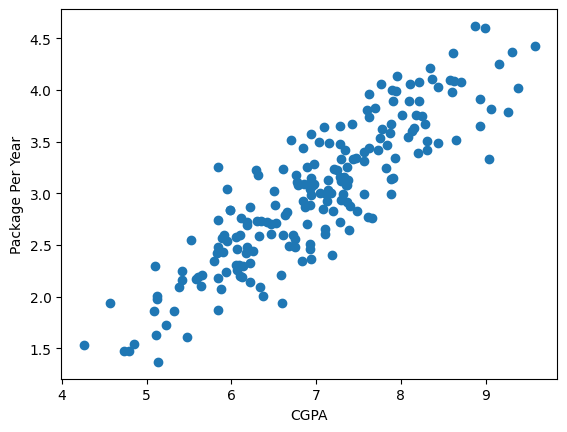

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package Per Year")


In [7]:
# to train the model, better to separate the input which X and output which is Y
X = df.iloc[:,0:1]  # : = select all rows, 0:1 means select the first column
y = df.iloc[:,-1]   # : = select all rows, -1 means select the last column
X                   # display the value of X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y     # display value of the last column which is the output

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [10]:
# Next part is to train test split which means train the model for some data and hide the rest data for the testing purspose
# Usually 80% = training data and 20% = testing data
# we have to import train_test_split from the sklearn and divide the data into four arrays

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Now select the algorithm to apply
from sklearn.linear_model import LinearRegression
lr = LinearRegression()     # create object of the algorithm
lr.fit(X_train,y_train)     # fit() method is used to train the model


LinearRegression()

In [11]:
# Now check the values of the X_test and y_test before model prediction
X_test


,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [12]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [13]:
# for the first item in the above result, the CGPA 8.58 having salary as 4.10,
# Now predict for the model as well
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [14]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

Text(0, 0.5, 'Salary Per Year')

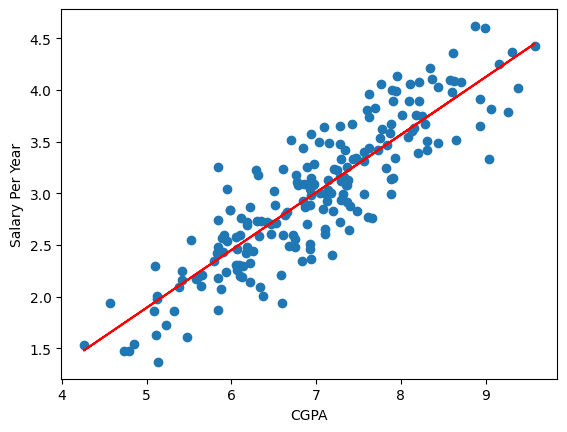

In [16]:
# The model results is a bit off but lets first draw the linear line
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color="red")
plt.xlabel("CGPA")
plt.ylabel("Salary Per Year")

In [17]:
# Now as the line draws straight, so there should be slope and intercept values as well
# Slope and intercept values can be find as

m = lr.coef_
b = lr.intercept_

# y = mx + b  which is equation of the line

# Hence proved the algorithm calculate the value of the m and b and upon new CGPA input(X), the model will predict the output(Y)